In [4]:
from __future__ import print_function
import openturns as ot

In [32]:
# Create the model (x1,x2) --> (y) = (4.*x1+5.*x2)
model = ot.SymbolicFunction(['x1', 'x2'], ['1.*x1 + 3.*x2'])

In [33]:
# Create the input independent joint distribution
distribution = ot.Normal(2)
distribution.setDescription(['X1', 'X2'])

In [34]:
distribution

class=Normal name=Normal dimension=2 mean=class=Point name=Unnamed dimension=2 values=[0,0] sigma=class=Point name=Unnamed dimension=2 values=[1,1] correlationMatrix=class=CorrelationMatrix dimension=2 implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[1,0,0,1]

In [35]:
copula

class=NormalCopula name=NormalCopula dimension=2 correlation=class=CorrelationMatrix dimension=2 implementation=class=MatrixImplementation name=Unnamed rows=2 columns=2 values=[1,0.907981,0.907981,1]

In [36]:
# Create the correlated input distribution
S = ot.CorrelationMatrix(2)
S[1, 0] = 0.9
R = ot.NormalCopula.GetCorrelationFromSpearmanCorrelation(S)
copula = ot.NormalCopula(R)
distribution_corr = ot.ComposedDistribution([ot.Normal()] * 2, copula)

In [37]:
# ANCOVA needs a functional decomposition of the model
enumerateFunction = ot.LinearEnumerateFunction(2)
productBasis = ot.OrthogonalProductPolynomialFactory([ot.HermiteFactory()]*2, enumerateFunction)
adaptiveStrategy = ot.FixedStrategy(productBasis, enumerateFunction.getStrataCumulatedCardinal(4))
samplingSize = 250
projectionStrategy = ot.LeastSquaresStrategy(ot.MonteCarloExperiment(samplingSize))
algo = ot.FunctionalChaosAlgorithm(model, distribution, adaptiveStrategy, projectionStrategy)
algo.run()
result = ot.FunctionalChaosResult(algo.getResult())

In [38]:
# Create the input sample taking account the correlation
size = 2000
sample = distribution_corr.getSample(size)

In [39]:
# Perform the decomposition
ancova = ot.ANCOVA(result, sample)
# Compute the ANCOVA indices (first order and uncorrelated indices are computed together)
indices = ancova.getIndices()
# Retrieve uncorrelated indices
uncorrelatedIndices = ancova.getUncorrelatedIndices()
# Retrieve correlated indices:
correlatedIndices = indices - uncorrelatedIndices

In [40]:
# Print Sobol' indices, the physical part, and the correlation part
print("ANCOVA indices ", indices)
print("ANCOVA uncorrelated indices ", uncorrelatedIndices)
print("ANCOVA correlated indices ", correlatedIndices)

ANCOVA indices  [0.243366,0.756634]
ANCOVA uncorrelated indices  [0.0656984,0.578966]
ANCOVA correlated indices  [0.177668,0.177668]


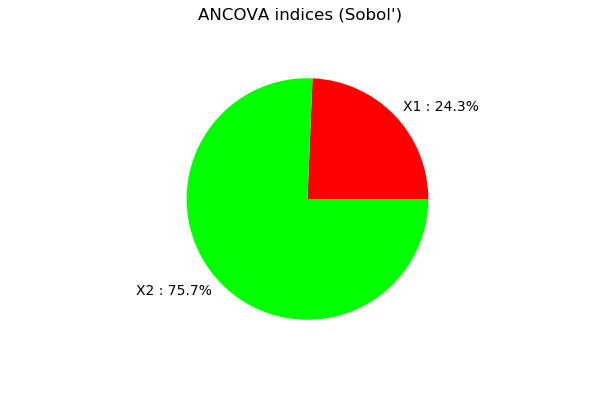

In [41]:
ot.SobolIndicesAlgorithm.DrawImportanceFactors(indices, distribution.getDescription(), 'ANCOVA indices (Sobol\')')

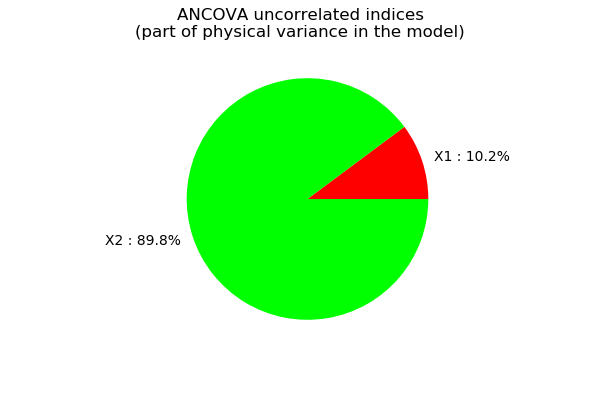

In [42]:
ot.SobolIndicesAlgorithm.DrawImportanceFactors(uncorrelatedIndices, distribution.getDescription(), 'ANCOVA uncorrelated indices\n(part of physical variance in the model)')

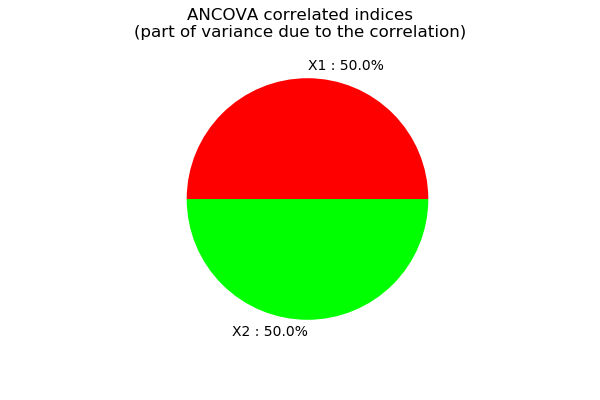

In [43]:
ot.SobolIndicesAlgorithm.DrawImportanceFactors(correlatedIndices, distribution.getDescription(), 'ANCOVA correlated indices\n(part of variance due to the correlation)')